## Replica model

### Extracting SIFT points 

Testing sift keypoints and descriptors extraction + point matching

In [1]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 
import sys

sys.path.insert(0, "../model/")
from utils import *

path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'
replica_dir = '/mnt/project_replica/datasets/cini/'


2022-04-16 17:36:24.119419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data = pd.read_csv(data_dir + 'dedup_data_sample.csv')
data.shape

(12862, 49)

16888


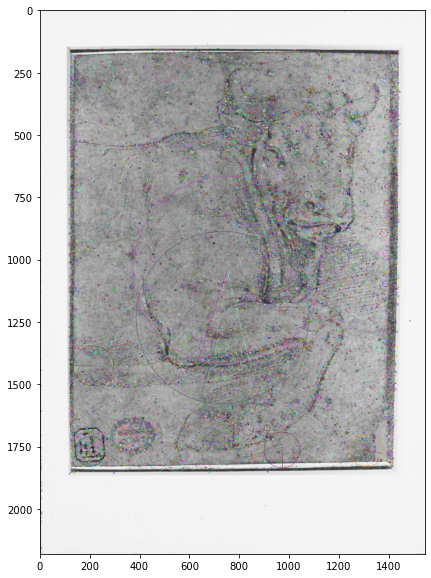

In [3]:
#reading image
img = cv2.imread(replica_dir + data.sample()['path'].values[0])  

#keypoints
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
print(len(kp))
img=cv2.drawKeypoints(gray,kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1,1, figsize=(20,10))
plt.imshow(img)


In [4]:
train = pd.read_csv(data_dir + 'dataset/abc_train_100.csv')
train

Unnamed: 0  index                                 A  \
0               0      5  06d37d5e06ce4b40b583c1cb6d7f68b2   
1               1      5  06d37d5e06ce4b40b583c1cb6d7f68b2   
2               2      5  06d37d5e06ce4b40b583c1cb6d7f68b2   
3               3      5  06d37d5e06ce4b40b583c1cb6d7f68b2   
4               4      5  06d37d5e06ce4b40b583c1cb6d7f68b2   
...           ...    ...                               ...   
17899       17899   2858  a7d5691e942b4f439f4fbe15679a95a8   
17900       17900   2858  a7d5691e942b4f439f4fbe15679a95a8   
17901       17901   2858  a7d5691e942b4f439f4fbe15679a95a8   
17902       17902   2858  a7d5691e942b4f439f4fbe15679a95a8   
17903       17903   2858  a7d5691e942b4f439f4fbe15679a95a8   

                                      B                                 C  \
0      b91c9e7b758249bfaa60046166560783  7af27cf8d2144f328e6fc5561c6ee213   
1      b91c9e7b758249bfaa60046166560783  7918588e8a5e432b876915a0cd6894d7   
2      b91c9e7b758249bfaa60046166560783  fe4fda9cacb94efe8da17aac33d8b6e4   
3      b91c9e7b758249bfaa60046166560783  3879662544c94e91ad3b653cbe959db3   
4      b91c9e7b758249bfaa60046166560783  30e42264670744019db1c1ba59ff3032   
...                                 ...                               ...   
17899  111f79c1ec1f4bfeb70b209d98204b4d  7e5ed249625645868bf212460f849445   
17900  111f79c1ec1f4bfeb70b209d98204b4d  a5ddf52c79fc421eb8eab5b2d62327ea   
17901  111f79c1ec1f4bfeb70b209d98204b4d  7f8bb54dcb72400b841945ae21a547c3   
17902  111f79c1ec1f4bfeb70b209d98204b4d  2edce5ceb33f434ca169af334f6d36d4   
17903  111f79c1ec1f4bfeb70b209d98204b4d  7b53502080114180a107f881dab6d19c   

         set            A_path             B_path             C_path  
0      train  157A/157A_49.jpg  158C/158C_213.jpg  156C/156C_231.jpg  
1      train  157A/157A_49.jpg  158C/158C_213.jpg     71B/71B_43.jpg  
2      train  157A/157A_49.jpg  158C/158C_213.jpg  121B/121B_575.jpg  
3      train  157A/157A_49.jpg  158C/158C_213.jpg     71B/71B_38.jpg  
4      train  157A/157A_49.jpg  158C/158C_213.jpg  113C/113C_274.jpg  
...      ...               ...                ...                ...  
17899  train   53C/53C_256.jpg    47A/47A_824.jpg    50C/50C_136.jpg  
17900  train   53C/53C_256.jpg    47A/47A_824.jpg    46A/46A_564.jpg  
17901  train   53C/53C_256.jpg    47A/47A_824.jpg     62B/62B_21.jpg  
17902  train   53C/53C_256.jpg    47A/47A_824.jpg    53C/53C_743.jpg  
17903  train   53C/53C_256.jpg    47A/47A_824.jpg   120C/120C_92.jpg  

[17904 rows x 9 columns]

377 559


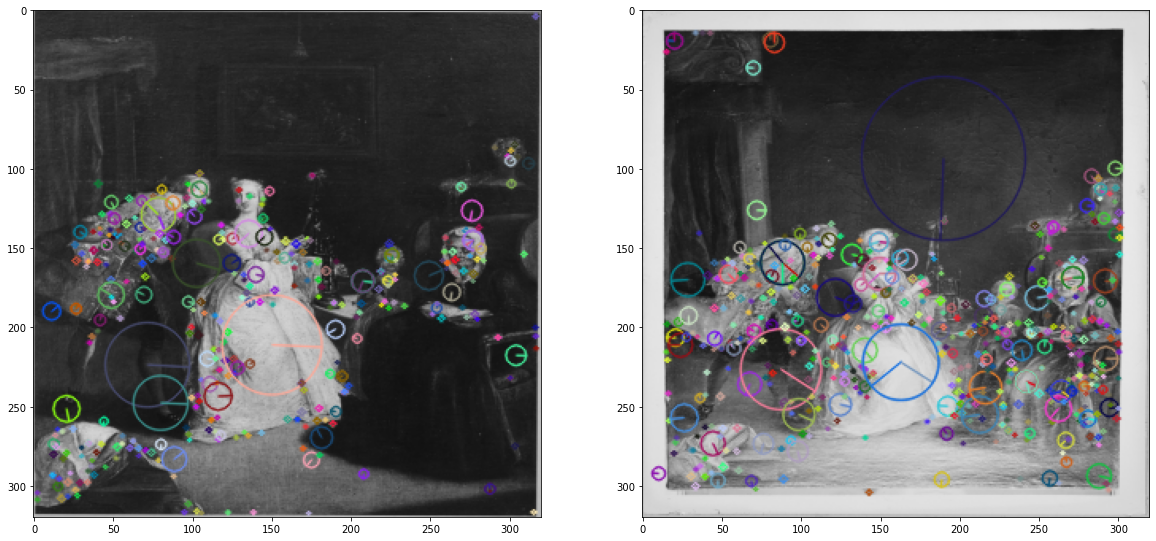

In [5]:
sample = train.sample()
img1 = cv2.imread(replica_dir + sample['A_path'].values[0]) 
img1 = cv2.resize(img1, (320,320), interpolation = cv2.INTER_AREA)
img2 = cv2.imread(replica_dir + sample['B_path'].values[0])  
img2 = cv2.resize(img2, (320,320), interpolation = cv2.INTER_AREA)

#keypoints
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

print(len(kp1), len(kp2))

img1=cv2.drawKeypoints(gray1,kp1,img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2=cv2.drawKeypoints(gray2,kp2,img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].imshow(img1)
axs[1].imshow(img2)


123


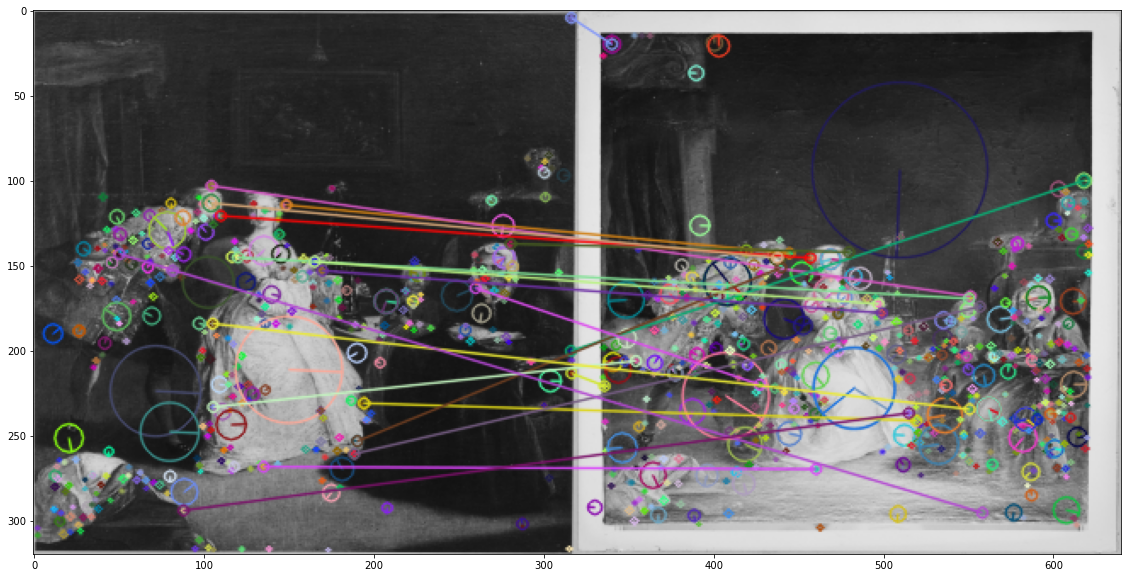

(<matplotlib.image.AxesImage at 0x7f7e5f30f1f0>, None)

In [6]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

print(len(matches))
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], img2, flags=2, matchesThickness = 1)
fig, axs = plt.subplots(1,1, figsize=(20,10))
plt.imshow(img3),plt.show()

In [12]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [13]:
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


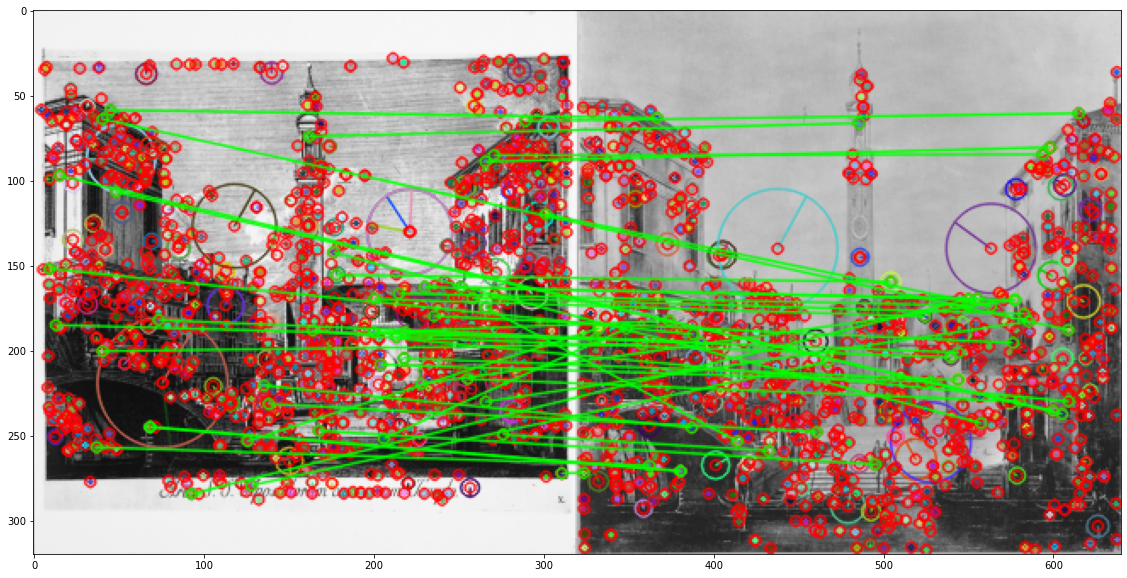

43


In [14]:

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

count = 0
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
        count += 1

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   #matchesThickness = 3,
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
fig, axs = plt.subplots(1,1, figsize=(20,10))
plt.imshow(img3,),plt.show()
print(count)

In [27]:
from scipy.spatial import distance
from sklearn.linear_model import RANSACRegressor

def get_candidates(des1, des2, kp1, kp2, norm_epsilon=0, margin=1, crosscheck_limit=2): #f_map_1, f_map_2, 
    # normalize(f_map_1, norm_epsilon)
    # normalize(f_map_2, norm_epsilon)

    # h1, w1, d_size = f_map_1.shape

    # h2, w2, _ = f_map_2.shape
    # # Convert to descriptors, keypoint versions
    # des1 = np.ascontiguousarray(f_map_1[margin:h1 - margin, margin:w1 - margin]).reshape((-1, d_size))
    # des2 = np.ascontiguousarray(f_map_2[margin:h2 - margin, margin:w2 - margin]).reshape((-1, d_size))
    # kp1 = (nb_unravel_array(np.arange(len(des1)), (h1 - 2 * margin, w1 - 2 * margin)) + 0.5 + margin).astype(np.float32)
    # kp2 = (nb_unravel_array(np.arange(len(des2)), (h2 - 2 * margin, w2 - 2 * margin)) + 0.5 + margin).astype(np.float32)
    # # Because of the margin, the arrays might be empty
    if len(kp1) == 0 or len(kp2) == 0:
        return np.empty((0, 2), np.float32), np.empty((0, 2), np.float32),  np.empty((0,), np.float32)
    # d = distance.cdist(des1, des2)
    d = 1 - des1 @ des2.T  # Warning, that is ~1/2 of the euclidean distance since des1.norm ~ des2.norm ~ 1
    best_1 = np.empty((len(d), crosscheck_limit), dtype=np.int32)
    for i in range(len(d)):
        best_1[i, :] = np.argsort(d[i, :])[:crosscheck_limit]
    d_T = d.T
    best_2 = np.empty((len(d_T), crosscheck_limit), dtype=np.int32)
    for i in range(len(d_T)):
        best_2[i, :] = np.argsort(d_T[i, :])[:crosscheck_limit]

    # best_1 = np.argsort(d, axis=1)[:, :crosscheck_limit]
    # best_2 = np.argsort(d.T, axis=1)[:, :crosscheck_limit]
    best_1_o = [set(best_1[i, :]) for i in range(len(best_1))]
    best_2_o = [set(best_2[i, :]) for i in range(len(best_2))]
    # d = des1 @ des2.T
    # best_1 = np.argmax(d, axis=1)
    # best_2 = np.argmax(d, axis=0)
    good = np.array([(i, j) for i, s in enumerate(best_1_o) for j in s if i in best_2_o[j]])
    print(good[:, 0])
    print(kp1[0].pt)
    src_pts = kp1[good[:, 0]]
    dst_pts = kp2[good[:, 1]]
    distances = np.array([d[good[i, 0], good[i, 1]] for i in range(len(good))])
    return src_pts, dst_pts, distances


In [28]:
get_candidates(des1, des2, kp1, kp2)

[  4   5   5   6   6   7   8   9  10  11  12  14  15  15  17  18  18  20
  22  24  24  25  25  26  28  28  29  29  30  31  31  35  35  36  37  37
  39  39  42  42  43  44  46  46  47  47  48  49  49  50  50  51  52  53
  54  55  58  58  59  59  60  60  62  62  65  65  66  67  67  68  69  70
  71  72  72  73  74  74  75  75  76  77  77  78  79  79  81  81  83  83
  84  84  85  86  86  87  87  88  88  92  93  93  94  95  95  96  97  98
  99 100 100 101 102 102 104 105 105 106 107 107 108 108 111 112 113 114
 114 115 116 116 117 117 119 120 121 121 122 123 124 125 125 126 127 127
 129 130 130 131 131 132 132 134 136 137 137 138 138 141 142 143 144 145
 145 146 147 147 148 148 149 149 150 151 151 152 152 153 153 154 155 156
 157 158 158 159 162 162 163 163 164 165 165 166 167 168 168 169 170 170
 171 171 172 174 174 176 176 177 178 178 179 179 181 181 182 182 183 184
 184 185 185 186 186 187 187 188 188 189 189 190 190 191 192 192 193 193
 194 195 195 196 196 197 197 199 200 201 201 203 20

TypeError: only integer scalar arrays can be converted to a scalar index

In [32]:
des1[0], kp1[0].pt, kp1[0].size, kp1[0].angle

(array([ 50.,  55.,  16.,   8.,   1.,   1.,   2.,  11.,  71.,  17.,  25.,
         39.,   6.,   7.,   4.,   5., 197.,   4.,   1.,   1.,   0.,   1.,
          1.,  16.,  45.,   0.,   0.,   0.,   3.,   1.,   0.,   3.,   7.,
         65.,  14.,   1.,   0.,   0.,   0.,   0., 117.,  69.,  25.,   5.,
          0.,   0.,   0.,   1., 197.,  17.,   0.,   0.,   0.,   0.,   0.,
          7.,  54.,   0.,   0.,   0.,   5.,   0.,   0.,   2.,   2.,  14.,
          3.,   0.,   0.,   0.,   0.,   0., 175.,  33.,   6.,   0.,   0.,
          0.,   0.,   2., 197.,   6.,   0.,   0.,   0.,   0.,   0.,  12.,
         52.,   0.,   0.,   0.,   5.,   0.,   0.,   2.,   1.,   2.,   1.,
          0.,   0.,   0.,   0.,   0., 167.,   3.,   0.,   0.,   0.,   0.,
          0.,   5., 197.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,  37.,
          0.,   0.,   0.,   5.,   0.,   0.,   2.], dtype=float32),
 (10.070148468017578, 286.8363952636719),
 2.022474527359009,
 178.9189453125)

In [ ]:
def spatially_coherent_mask(src_pts, dst_pts, residual_threshold=2.0):
    min_x0_y0, increment_x0_y0 = -15, 1
    max_x0_y0 = -min_x0_y0
    possible_x0 = np.arange(min_x0_y0, max_x0_y0, increment_x0_y0, np.int32)
    possible_y0 = np.arange(min_x0_y0, max_x0_y0, increment_x0_y0, np.int32)
    possible_lambdas = np.exp(np.arange(-7, 7)*0.2)  # ln(4) ~ 1.4 so 0.25-4x zoom
    possible_params = np.zeros((len(possible_x0), len(possible_y0), len(possible_lambdas), 2))
    for i in range(len(src_pts)):
        src_y, src_x = src_pts[i]
        dst_y, dst_x = dst_pts[i]
        for i_lamb, lamb in enumerate(possible_lambdas):
            x0 = dst_x-lamb*src_x
            y0 = dst_y-lamb*src_y
            i_x0 = int(round((x0-min_x0_y0)/increment_x0_y0))
            i_y0 = int(round((y0-min_x0_y0)/increment_x0_y0))
            if 0 <= i_x0 < len(possible_x0) and 0 <= i_y0 < len(possible_y0):
                possible_params[i_x0, i_y0, i_lamb, 0] += 1

            # Flip
            x0 = dst_x+lamb*src_x
            i_x0 = int(round((x0-min_x0_y0)/increment_x0_y0))
            if 0 <= i_x0 < len(possible_x0) and 0 <= i_y0 < len(possible_y0):
                possible_params[i_x0, i_y0, i_lamb, 1] += 1

    best_inds = np.argsort(possible_params.ravel())[-5:]
    best_inliers = 0
    best_mask = np.full(len(src_pts), False, dtype=np.bool_)
    best_M = np.array([
                [1, 0],
                [0, 1],
                [0, 0]
            ], dtype=np.float32)
    mask = best_mask.copy()
    preds = np.empty((1, 2), dtype=np.float32)
    src_pts_intercept = np.concatenate((src_pts, np.ones((len(src_pts), 1), dtype=np.float32)), axis=1)
    for ind in best_inds:
        i_x0, i_y0, i_lamb, is_flipped = nb_unravel(ind, dims=possible_params.shape)
        x0 = possible_x0[i_x0]
        y0 = possible_y0[i_y0]
        lamb = possible_lambdas[i_lamb]

        M = np.array([
                [lamb, 0],
                [0, (1-2*int(is_flipped))*lamb],
                [y0, x0]
            ], dtype=np.float32)
        preds = src_pts_intercept @ M
        mask = np.sum(np.square(preds-dst_pts), axis=1) <= residual_threshold
        if np.sum(mask) > best_inliers:
            best_inliers = np.sum(mask)
            best_mask[:] = mask
            best_M = M

    assert np.sum(best_mask) == best_inliers, "weird"

    if best_inliers > 0:
        assert np.sum(best_mask) > 0, "weird2"
        # Refine matrix
        #M, _, _, _ = np.linalg.lstsq(np.concatenate([src_pts[best_mask], np.ones((np.sum(best_mask), 1))], axis=1),
        #                             dst_pts[best_mask], rcond=-1)
        return best_M, best_mask
    else:
        print("No inliers?")
        return best_M, best_mask


def match_feature_maps(f_map_1, f_map_2, norm_epsilon=0, margin=1, crosscheck_limit=3):
    with Timer("candidates", disable=True):
        src_pts, dst_pts, distances = get_candidates(f_map_1, f_map_2, norm_epsilon, margin, crosscheck_limit)

    if len(src_pts) == 0:
        print("No candidates")

    with Timer("spatially_coherent", disable=True):
        M, mask = spatially_coherent_mask(src_pts, dst_pts, residual_threshold=2.0)
    num_matches = int(np.sum(mask))

    h1, w1, _ = f_map_1.shape
    h2, w2, _ = f_map_2.shape

    if num_matches == 0:
        return num_matches, None, (src_pts, dst_pts), mask.tolist(), ((0,0,1,1), (0,0,1,1))

    m1 = np.min(src_pts[mask], axis=0)
    m2 = np.max(src_pts[mask], axis=0)
    box1 = ((m1[0]-0.5)/h1, (m1[1]-0.5)/w1, (m2[0]-m1[0]+1)/h1, (m2[1]-m1[1]+1)/w1)
    m1 = np.min(dst_pts[mask], axis=0)
    m2 = np.max(dst_pts[mask], axis=0)
    box2 = ((m1[0]-0.5)/h2, (m1[1]-0.5)/w2, (m2[0]-m1[0]+1)/h2, (m2[1]-m1[1]+1)/w2)

    return num_matches, None, (src_pts, dst_pts), mask.tolist(), (box1, box2)